## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


In [0]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot as plt

### Find no.of samples are there in training and test datasets

In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Find dimensions of an image in the dataset

In [4]:
x_train.shape[1:]

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

In [20]:
model=Sequential()

# First conv layer

model.add(Convolution2D(32,3,3,input_shape=(28,28,1)))

model.add(Activation('relu'))

#second conv layer

model.add(Convolution2D(32,3,3,))

model.add(Activation('relu'))

#fully connected layer

model.add(Flatten())

model.add(Dense(128))

model.add(Activation('relu'))

model.add(Dense(10))

model.add(Activation('softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

early_stops=keras.callbacks.EarlyStopping(patience=5)

call_backs=[early_stops]

model.fit(x_train,y_train,batch_size=32,nb_epoch=10,validation_data=(x_test, y_test), callbacks=call_backs)

 



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.3808 - acc: 0.8632 - val_loss: 0.3108 - val_acc: 0.8865
Epoch 2/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.2335 - acc: 0.9134 - val_loss: 0.2617 - val_acc: 0.9048
Epoch 3/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.1666 - acc: 0.9382 - val_loss: 0.2513 - val_acc: 0.9125
Epoch 4/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.1155 - acc: 0.9569 - val_loss: 0.2770 - val_acc: 0.9136
Epoch 5/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.0765 - acc: 0.9718 - val_loss: 0.3299 - val_acc: 0.9085
Epoch 6/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0507 - acc: 0.9815 - val_loss: 0.3768 - val_acc: 0.9131
Epoch 7/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0368 - acc: 0.9867 - val_loss: 0.

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [21]:
model=Sequential()

# First conv layer

model.add(Convolution2D(32,3,3,input_shape=(28,28,1)))

model.add(Activation('relu'))

#second conv layer

model.add(Convolution2D(32,3,3,))

model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
    
# Dropout
model.add(Dropout(0.25))

 #fully connected layer

model.add(Flatten())

model.add(Dense(128))

model.add(Activation('relu'))

 
model.add(Dense(10))

model.add(Activation('softmax'))

 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

early_stops=keras.callbacks.EarlyStopping(patience=5)

call_backs=[early_stops]

model.fit(x_train,y_train,batch_size=32,nb_epoch=10,validation_data=(x_test, y_test), callbacks=call_backs)

 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.3965 - acc: 0.8567 - val_loss: 0.3015 - val_acc: 0.8881
Epoch 2/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.2597 - acc: 0.9044 - val_loss: 0.2567 - val_acc: 0.9071
Epoch 3/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.2115 - acc: 0.9214 - val_loss: 0.2366 - val_acc: 0.9134
Epoch 4/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.1796 - acc: 0.9326 - val_loss: 0.2283 - val_acc: 0.9183
Epoch 5/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.1527 - acc: 0.9432 - val_loss: 0.2658 - val_acc: 0.9111
Epoch 6/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.1334 - acc: 0.9509 - val_loss: 0.2172 - val_acc: 0.9242
Epoch 7/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.1131 - acc: 0.9575 - val_loss: 0.2643 - 

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)


#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

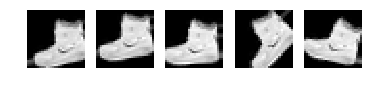

In [24]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [27]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


model.fit_generator(datagen.flow(x_train,y_train,
                                batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=call_backs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.7768 - acc: 0.7210 - val_loss: 0.3387 - val_acc: 0.8813
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5383 - acc: 0.7987 - val_loss: 0.3840 - val_acc: 0.8708
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4787 - acc: 0.8228 - val_loss: 0.3235 - val_acc: 0.8874
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4485 - acc: 0.8337 - val_loss: 0.3166 - val_acc: 0.8903
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4290 - acc: 0.8410 - val_loss: 0.3181 - val_acc: 0.8876
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4107 - acc: 0.8491 - val_loss: 0.3388 - val_acc: 0.8796
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3980 - acc: 0.8528 - val_loss: 0.3028 - val_acc: 0.8901
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [28]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 55us/step


[0.31371306624412537, 0.8934]